In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from time import clock
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make sure that caffe is on the python path:
caffe_root = '/home/lym/work/code/caffeopencl-clcaffe/'  # this file is expected to be in {caffe_root}/examples
import os
os.chdir(caffe_root)
import sys
sys.path.insert(0, 'python')

import caffe
caffe.set_device(0)
caffe.set_mode_gpu()

[[[  0.           6.           0.74967402   0.74052864   0.21412982
     0.32206914   0.17329951]
  [  0.           1.           0.71927142   0.43985602   0.49498957
     0.58344847   0.44870749]
  [  0.          11.           0.77516192   0.27574122   0.60575068
     0.27555576   0.57263517]]]


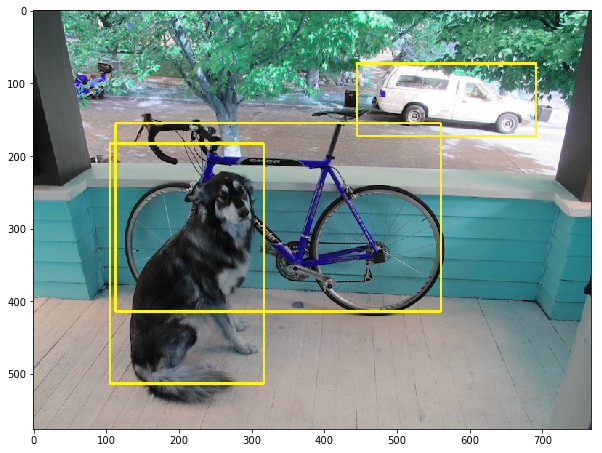

In [16]:
pic = 'examples/images/dog.jpg'
#image = cv2.imread('examples/images/fish-bike.jpg')
image = caffe.io.load_image(pic)
transformer = caffe.io.Transformer({'data': (1, 3, 416, 416)})
transformer.set_transpose('data', (2, 0, 1))  # move image channels to outermost dimension
transformed_image = transformer.preprocess('data', image)

model_def = '/home/lym/work/code/caffeopencl-clcaffe/models/yolo_deploy.prototxt'
model_weights = '/home/lym/work/code/caffeopencl-clcaffe/models/yolo.caffemodel'

net = caffe.Net(model_def, model_weights, caffe.TEST)
net.blobs['data'].reshape(1, 3, 416, 416)
net.blobs['data'].data[...] = transformed_image
output = net.forward()
res = output['detection_out'][0]
print res

index = 0
box = []
boxes = []
for c in range(res.shape[0]):
    for h in range(res.shape[1]):
        for w in range(res.shape[2]):
            box.append(res[c][h][w])
        boxes.append(box)
        box = []

w = image.shape[1]
h = image.shape[0]

im = cv2.imread(pic)
for box in boxes:
    left = (box[3]-box[5]/2.0) * w;
    right = (box[3]+box[5]/2.0) * w;
    top = (box[4]-box[6]/2.0) * h;
    bot = (box[4]+box[6]/2.0) * h;
    if left < 0:
        left = 0
    if right > w:
        right = w
    if top < 0:
        top = 0
    if bot > h:
        bot = h
    color = (255, 242, 35)
    cv2.rectangle(im,(int(left), int(top)),(int(right),int(bot)),color,2)

plt.imshow(im)